In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from matplotlib.lines import Line2D
from nameparser import HumanName
import gender_guesser.detector as gender
from scipy.stats import chi2_contingency
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import ethnicolr
from ethnicolr import pred_census_ln

In [2]:
# File Paths
absolute_path = "C:\\Users\\tykun\\\OneDrive\\Documents\\SchoolDocs\VSCodeProjects\\connectedData\\board_analysis\\"
altered_dataframes = "altered_dataframes\\"
gpt_dataframes = "gpt_dataframes\\"
graphs = "graphs\\"
scripts =  "scripts\\"
board_dataframes = "board_dataframes\\"

altered_dataframe_path = f"{absolute_path}{altered_dataframes}"
gpt_dataframe_path = f"{absolute_path}{gpt_dataframes}" 
graph_path = f"{absolute_path}{graphs}"
script_path = f"{absolute_path}{scripts}"
boards_path = f"{absolute_path}{board_dataframes}"

# Valid Years
years = ["1999", "2000", "2005", "2007", "2008", "2009", "2011", "2013", "2018"]

In [3]:
def plot_cumulative_female_distribution(numbers_df, year1, year2):
    """
    Plots the cumulative frequency distribution of female board members for two specified years.

    Args:
        numbers_df (pd.DataFrame): The DataFrame containing board data with columns 'Year', 'Institution', 'female', and 'male'.
        year1 (int): The first year for comparison.
        year2 (int): The second year for comparison.
    """
    def prepare_data_for_year(df, year):
        """
        Prepares a mapping of universities to the proportion of female board members for a specified year.

        Args:
            df (pd.DataFrame): The DataFrame containing board data.
            year (int): The year to filter the data by.

        Returns:
            list: A sorted list of proportions of female board members.
        """
        university_map = {}
        for index, row in df.iterrows():
            if str(row["Year"]) == str(year):
                total_members = row["female"] + row["male"]
                if total_members > 0:
                    prop = row["female"] / total_members
                    university_map[row["Institution"]] = prop
        
        # Sort proportions in ascending order for proper cumulative distribution
        return sorted(university_map.values())
    
    # Prepare data for the specified years
    sorted_proportions_year1 = prepare_data_for_year(numbers_df, year1)
    sorted_proportions_year2 = prepare_data_for_year(numbers_df, year2)

    # Calculate the cumulative percentage of universities for the specified years
    num_universities_year1 = len(sorted_proportions_year1)
    cumulative_percent_year1 = [(i + 1) / num_universities_year1 * 100 for i in range(num_universities_year1)]

    num_universities_year2 = len(sorted_proportions_year2)
    cumulative_percent_year2 = [(i + 1) / num_universities_year2 * 100 for i in range(num_universities_year2)]

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot year1 data with swapped axes
    plt.plot(sorted_proportions_year1, cumulative_percent_year1, marker='o', markersize=3, linestyle='None', color='red', label=str(year1))

    # Plot year2 data with swapped axes
    plt.plot(sorted_proportions_year2, cumulative_percent_year2, marker='o', markersize=3, linestyle='None', color='deepskyblue', label=str(year2))

    # Labeling the plot
    plt.title(f'Cumulative Frequency Distribution of Female Board Members ({year1} vs {year2})', fontsize=16, fontweight='bold')
    plt.xlabel('Proportion of Female Board Members', fontsize=14)
    plt.ylabel('Percent of Universities', fontsize=14)

    # Set x and y axis limits
    plt.xlim(0, 1)
    plt.ylim(0, 100)

    # Adjusting ticks to show percentages on y-axis
    plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'])

    # Add grid with a softer, dashed line for readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

    # Add legend to distinguish between years
    plt.legend()

    # Tight layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

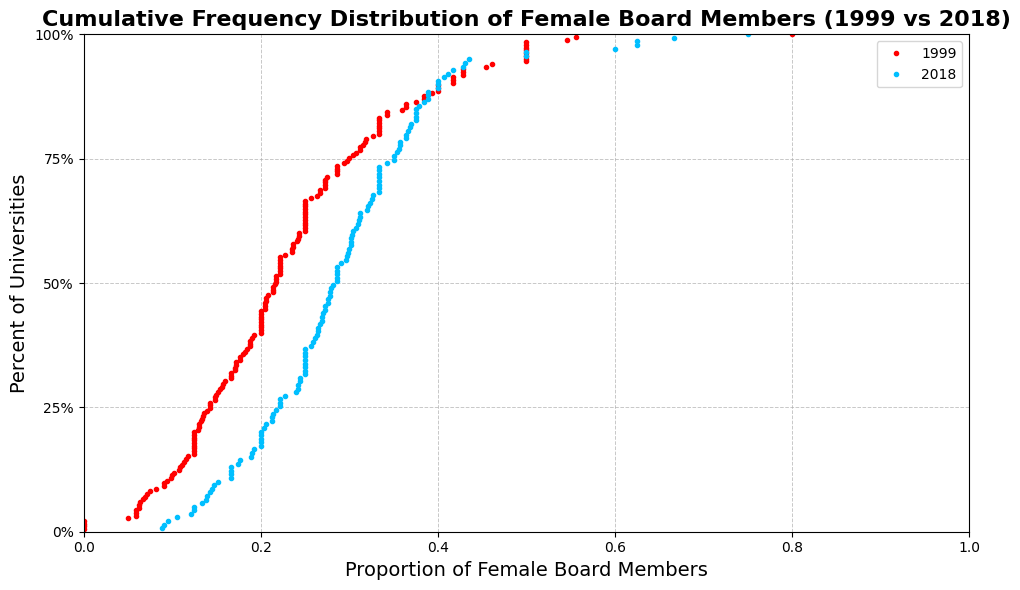

In [4]:
diversity_statistics_df = pd.read_csv(f"{altered_dataframe_path}sample_board_statistics.csv")
plot_cumulative_female_distribution(diversity_statistics_df, 1999, 2018)